<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Paul!

I'm happy to review your project today  🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
<div class="alert alert-info"> <b>Student comments: </div>    

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
    
Hello Paul,

You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements. 
    
You’ll find specific feedback in the notebook in the ‘Comments’ (`Reviewer's comment v1`) sections.
    
**What Was Great:**

- You demonstrated a thorough approach to data loading, preparation, and cleaning, ensuring the data was in optimal shape for analysis.
    
**Areas to Improve:**

- Double-check for missing values in the final table after calculating revenue, and assess how NaN values impact key dataset statistics. 
   
Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for clarification.
</div>

# Sprint 3 Project: Statistical Data Analysis

## Megaline Service Plan Analysis (2018) - Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

This analysis is being performed to assess which of the two Megaline plans, Surf or Ultimate, brings in more revenue for the company. The data being analyzed is from a subset of 500 Megaline clients in 2018 and includes their demographic information as well as call, messaging, and internet usage behavior.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! Additionally, you could add a short description of the tasks you plan to perform and the available data. This information could be helpful for the notebook reader.



## Initialization

All required libraries are being loaded.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import math

## Load data

All the previously mentioned data files are being loaded into their own tables. There are no unusual separators or formatting to worry about with these files, so no additional arguments are required.

In [2]:
# Load the data files into different DataFrames
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')

## Prepare the data

Next, an overview of each of the datasets is presented below.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


This dataset describes the parameters of each of the two Megaline plans: Surf and Ultimate. It displays what services are included in the monthly cost, and the costs for any addtional services incurred beyond the scope of the base plan. It is very straightforward, complete, and accurate, and requires no changes or additions. Purely for readability, I would move the plan name to the far left of the table.

## 1.5 Fix data

In [5]:
# This data seems fine as is and no changes are required, but for readability the plan name could be moved to the far left
plans = plans.iloc[:,[7,0,1,2,3,4,5,6]]
plans.sample(2)

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


## 1.6 Enrich data

In [6]:
# This data seems fine as is and no additions are required

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
257,1257,Gabriel,O'donnell,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,NaN


Each of the 500 users has a complete set of demographic data along with their chosen Megaline plan. 

Churn date is missing for most of them, which indicates they are currently subscribed to one of the Megaline plans. There is no missing data otherwise. 

Each city is listed as either a single city, or a region of multiple cities and/or states, with the text "MSA" following the state abbreviations. This will not interfere with analysis.

### Fix Data

In [9]:
# Reg date and churn date should be of type datetime for easier access to this data later
# Churn date has missing values for currently active plans, but this is fine since it doesn't apply to those users
# Every city has the text "MSA" after it, which could be removed, but shouldn't affect analysis so we can leave it as is
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data

In [10]:
# This data seems fine as is and no additions are required
# If we needed to analyze the average lengths of subscriptions to plans, I would add a column for their subscription duration
# This would be calculcated by reg_date - churn_date if churn_date isn't missing, or reg_date - today's date if it is

## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Print a sample of data for calls
calls.sample()

,id,user_id,call_date,duration
110835,1390_284,1390,2018-10-22,5.35


Calls made by the same user appear to have an additional call identifier number after their user ID, but there's no pattern to it other than it increases in value seemingly arbitrarily each call. The number of times a user ID appears will be a more reliable indicator for how many calls they made.

### Fix data

In [13]:
# Date should be of type datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

# The 'id' column includes each user_id plus a call identifier number after it - this column won't be helpful for analysis 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

In [14]:
# Call data should also have a column rounded up to the nearest minute, as an integer, since that's how it's billed
calls['duration_rounded'] = calls['duration'].apply(np.ceil).astype(int)
calls.sample(5)

,id,user_id,call_date,duration,duration_rounded
75592,1268_96,1268,2018-05-22,11.43,12
82910,1299_568,1299,2018-12-17,9.09,10
26536,1100_93,1100,2018-08-26,3.39,4
70880,1252_267,1252,2018-12-07,11.77,12
34488,1130_8,1130,2018-12-08,7.35,8


<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>
    
- Well done!  Good that you did not forget about data rounding. Also, great choice of np.ceil () function.
- This function by the way also works without `apply` which makes code shorter and faster.
    
```
calls['duration'] = np.ceil(calls['duration'])
```

## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Print a sample of data for messages
messages.sample()

,id,user_id,message_date
71914,1467_246,1467,2018-09-04


Messages made by the same user appear to have an additional message identifier number after their user ID, but there's no pattern to it other than it increases in value seemingly arbitrarily each message. The number of times a user ID appears will be a more reliable indicator for how many messages they sent.

### Fix data

In [17]:
# Date should be of type datetime for easier access to this data later
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

In [18]:
# This data seems fine as is and no additions are required

## Internet

In [19]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Print a sample of data for the internet traffic
internet.sample()

,id,user_id,session_date,mb_used
46300,1206_35,1206,2018-08-20,570.76


Internet sessions by the same user appear to have an additional session identifier number after their user ID, but there's no pattern to it other than it increases in value seemingly arbitrarily each session. The number of times a user ID appears will be a more reliable indicator for how many sessions they used.

### Fix data

In [21]:
# Session date should be of datetime type for easier access to this data later
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

In [22]:
# For completion sake, we could add a column for the MB used rounded up to the nearest GB since this is how it is billed
# However, this column won't be used for directly calculating billable internet traffic, since the monthly total is what is rounded, not individual sessions
# We will instead add this logic later on

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v1:</b>
    
Please note that for web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
Can you please move this logic after data aggregation?

I added this logic in the data aggregation step instead of here.

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>
    
One minor remark is that you need to divide by 1024 to get GB.

In [ ]:
This has been corrected.

## Study plan conditions

Megaline plans consist of two parts: 
    - A flat monthly cost that includes a predetermined amount of call minutes, messages, and internet traffic each month
    - An option to add additional minutes, messages, and/or internet usage (in GB) beyond the monthly allotment above
This information is contained within the plans table below:

In [23]:
# Print out the plan conditions and make sure they are clear for you
plans

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here. 

## 2.12 Aggregate data per user

In [24]:
# Calculate the number of calls made by each user per month. Save the result.
# We first have to group user_ids by month to separate their calls per month
# The call identifier is not a count of the calls made, therefore we should count the number of appearances of each user ID using value_counts
call_number = calls.groupby(calls['call_date'].dt.month)['user_id'].value_counts()
call_number

call_date  user_id
1          1077       42
           1196       42
           1362       42
           1185       23
           1042       18
                      ..
12         1104        4
           1358        4
           1323        3
           1339        3
           1452        3
Name: user_id, Length: 2258, dtype: int64

In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.
# We group by both the month (extracted from datetime) and user_id simultaneously
# We use duration_rounded column since this is how Megaline bills - each call is rounded BEFORE being combined
call_minutes = calls.groupby([calls['call_date'].dt.month, calls['user_id']])['duration_rounded'].sum()
call_minutes

call_date  user_id
1          1042       114
           1077       290
           1185       181
           1196       287
           1214        16
                     ... 
12         1495       492
           1496       294
           1497       300
           1498       339
           1499       496
Name: duration_rounded, Length: 2258, dtype: int64

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>
    
In `pivot_table` or `groupby` it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:


```
# Group by and aggregate
result = calls_df.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']}).reset_index()

# Flatten the MultiIndex in columns
result.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in result.columns.values]
result
```

In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
# Using groupby to separate data by month
# Each appearance of a user_id represents one of their messages, so I use value_counts
message_number = messages.groupby(messages['message_date'].dt.month)['user_id'].value_counts()
message_number

message_date  user_id
1             1077       37
              1196       23
              1362       21
              1214        2
2             1077       67
                         ..
12            1182        2
              1477        2
              1263        1
              1323        1
              1377        1
Name: user_id, Length: 1806, dtype: int64

In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
# Here, we need to sum all of a user's individual internet sessions for the month, THEN round up to the nearest GB for billing purposes
# This is done later as 'rounded_gb' but I left this here for reference to what I did originally
internet_traffic_gb = internet.groupby([internet['session_date'].dt.month, internet['user_id']])['mb_used'].sum()
internet_traffic_gb = internet_traffic_gb / 1024 # 1024 MB = 1 GB
internet_traffic_gb = internet_traffic_gb.apply(np.ceil).astype(int) # Round up to nearest value and cast as integer type
print(internet_traffic_gb)
# We also need the internet traffic in MB and unrounded for a later calculation, so we can add that here
internet_traffic_mb = internet.groupby([internet['session_date'].dt.month, internet['user_id']])['mb_used'].sum()
internet_traffic_mb

session_date  user_id
1             1042        2
              1077       11
              1185        7
              1196        9
              1214        2
                         ..
12            1495       25
              1496       17
              1497       12
              1498       24
              1499       23
Name: mb_used, Length: 2277, dtype: int64


session_date  user_id
1             1042        1854.93
              1077       10635.64
              1185        6812.77
              1196        8908.61
              1214        1315.35
                           ...   
12            1495       24097.40
              1496       16438.99
              1497       11106.55
              1498       23137.69
              1499       22059.21
Name: mb_used, Length: 2277, dtype: float64

In [28]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# We will add only unrounded MB internet traffic for later calculations - see below for rounded GB calculation
aggregate_data = pd.concat([call_number, call_minutes, message_number, internet_traffic_mb], axis=1, ignore_index=True) # Concatenate by column
aggregate_data.columns = ['call_number', 'call_minutes', 'message_number', 'internet_traffic_mb'] # Fixing column names
# Extracting multiindex 0 (month) to its own column to make it simpler in the future, and renaming its column appropriately
aggregate_data = aggregate_data.reset_index(level=0)
aggregate_data = aggregate_data.rename(columns={'level_0': 'month'})
print(aggregate_data.head())
aggregate_data.info()
# Replace missing values with 0 for more accurate mean calculations - total is 2293 so all columns have missing values
aggregate_data['call_number'] = aggregate_data['call_number'].fillna(value=0)
aggregate_data['call_minutes'] = aggregate_data['call_minutes'].fillna(value=0)
aggregate_data['message_number'] = aggregate_data['message_number'].fillna(value=0)
aggregate_data['internet_traffic_mb'] = aggregate_data['internet_traffic_mb'].fillna(value=0)
# Adding rounded GB column so we can group it by month for monthly billing purposes - FROM ABOVE PREVIOUSLY
aggregate_data['rounded_gb'] = aggregate_data['internet_traffic_mb'] / 1024 # 1024 MB = 1 GB
aggregate_data['rounded_gb'] = aggregate_data['rounded_gb'].apply(np.ceil).astype(int) # Rounding up and making it integer type
aggregate_data.info()
aggregate_data.sample()
print(aggregate_data.head(10))

         month  call_number  call_minutes  message_number  internet_traffic_mb
user_id                                                                       
1042         1         18.0         114.0             NaN              1854.93
1077         1         42.0         290.0            37.0             10635.64
1185         1         23.0         181.0             NaN              6812.77
1196         1         42.0         287.0            23.0              8908.61
1214         1          5.0          16.0             2.0              1315.35
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 1042 to 1499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                2293 non-null   int64  
 1   call_number          2258 non-null   float64
 2   call_minutes         2258 non-null   float64
 3   message_number       1806 non-null   float64
 4   internet_traffic_mb  2277 non-nul

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>

Well done! 

In [29]:
# Add the plan information
# Merge user plan details with aggregated usage data
users_with_plans = users[['user_id', 'plan']]
users_df_with_plan = users_with_plans.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Merge plan information to usage_data
aggregate_data = aggregate_data.merge(users_df_with_plan, on='user_id', how='left')

aggregate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   call_number            2293 non-null   float64
 3   call_minutes           2293 non-null   float64
 4   message_number         2293 non-null   float64
 5   internet_traffic_mb    2293 non-null   float64
 6   rounded_gb             2293 non-null   int64  
 7   plan                   2293 non-null   object 
 8   plan_name              2293 non-null   object 
 9   messages_included      2293 non-null   int64  
 10  mb_per_month_included  2293 non-null   int64  
 11  minutes_included       2293 non-null   int64  
 12  usd_monthly_pay        2293 non-null   int64  
 13  usd_per_gb             2293 non-null   int64  
 14  usd_per_message        2293 non-null   float64
 15  usd_

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

When calculating the mean of a dataset, it is common to fill missing values (i.e. NaN) with 0. This is because the mean is calculated by summing up all of the values in a dataset and then dividing by the number of values. If there are missing values in the dataset, the sum will not include those values, and the mean will be calculated based on a smaller sample size. This can lead to a biased or misleading result.

I added this as part of the data aggregation step.

In [30]:
# Calculate the monthly revenue for each user
# Revenue per user per month: monthly plan cost + (# minutes - included minutes) x plan minute cost + 
# (# messages - included messages) x plan msg cost + [rounded up to GB](MB - MB included) x plan GB cost
def monthly_revenue_calculation(row):
    monthly_charge = extra_minutes = extra_messages = extra_data = 0
# Surf plan
    if row['plan'] == 'surf':
        monthly_charge = row['usd_monthly_pay']
        if row['call_minutes'] > row['minutes_included']:
            extra_minutes = (row['call_minutes'] - row['minutes_included']) * row['usd_per_minute']
        if row['message_number'] > row['messages_included']:
            extra_messages = (row['message_number'] - row['messages_included']) * row['usd_per_message']
        # Extra internet use has to be calculated from MB due to plan terms, then we round up to the next GB
        if row['internet_traffic_mb'] > 15360:
            extra_data = math.ceil((row['internet_traffic_mb'] - row['mb_per_month_included']) / 1024) * row['usd_per_gb']
# Ultimate plan
    if row['plan'] == 'ultimate':
        monthly_charge = row['usd_monthly_pay']
        if row['call_minutes'] > row['minutes_included']:
            extra_minutes = (row['call_minutes'] - row['minutes_included']) * row['usd_per_minute']
        if row['message_number'] > row['messages_included']:
            extra_messages = (row['message_number'] - row['messages_included']) * row['usd_per_message']
        if row['internet_traffic_mb'] > 15360:
            extra_data = math.ceil((row['internet_traffic_mb'] - row['mb_per_month_included']) / 1024) * row['usd_per_gb']
    total_monthly_revenue = monthly_charge + extra_minutes + extra_messages + extra_data
    return total_monthly_revenue
aggregate_data['monthly_revenue'] = aggregate_data.apply(monthly_revenue_calculation, axis=1)
aggregate_data.reset_index()
aggregate_data

,user_id,month,call_number,call_minutes,message_number,internet_traffic_mb,rounded_gb,plan,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1042,1,18.0,114.0,0.0,1854.93,2,surf,surf,50,15360,500,20,10,0.03,0.03,20.0
1,1077,1,42.0,290.0,37.0,10635.64,11,ultimate,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
2,1185,1,23.0,181.0,0.0,6812.77,7,ultimate,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
3,1196,1,42.0,287.0,23.0,8908.61,9,ultimate,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
4,1214,1,5.0,16.0,2.0,1315.35,2,ultimate,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1495,12,65.0,492.0,0.0,24097.40,24,surf,surf,50,15360,500,20,10,0.03,0.03,110.0
2289,1496,12,40.0,294.0,11.0,16438.99,17,surf,surf,50,15360,500,20,10,0.03,0.03,40.0
2290,1497,12,54.0,300.0,50.0,11106.55,11,ultimate,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
2291,1498,12,39.0,339.0,0.0,23137.69,23,surf,surf,50,15360,500,20,10,0.03,0.03,100.0


<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>

Everything is correct here.

Btw it is also possible to make the calculation of revenue a bit different `np.where` - https://numpy.org/doc/stable/reference/generated/numpy.where.html
    
```
np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read it here: https://www.pythonpool.com/numpy-clip/
    

## Study user behaviour

Below, we will calculate some useful descriptive statistics for the aggregated and merged data, which reveals an overall picture captured by the data. 

### Calls

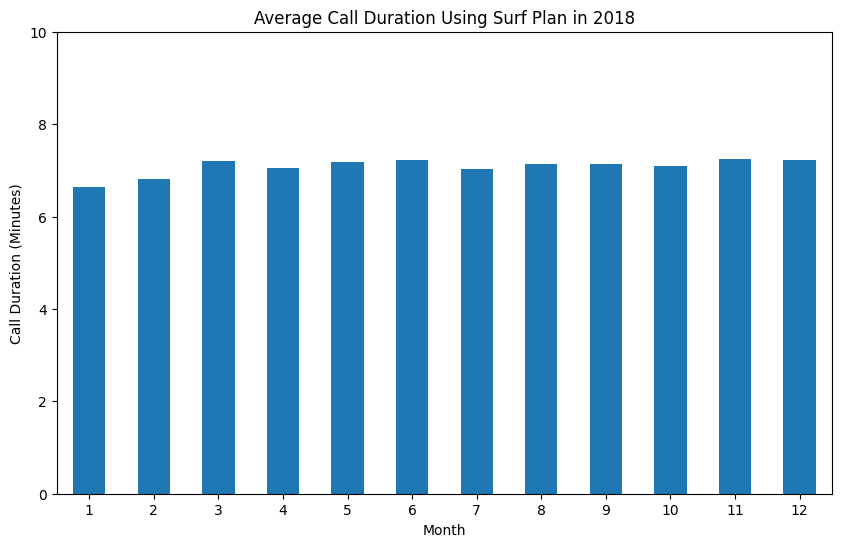

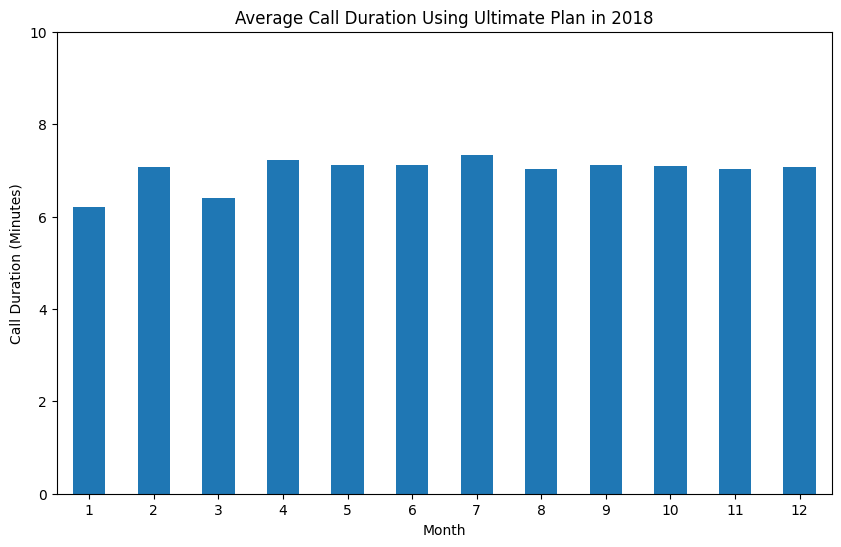

In [50]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
# Making new dataframes for call duration and call number by users of each plan per month
average_call_duration_surf = aggregate_data.query("plan == 'surf'")[['month','call_minutes','call_number']]
average_call_duration_ultimate = aggregate_data.query("plan == 'ultimate'")[['month','call_minutes', 'call_number']]
# Calculating average call duration by dividing total duration by number of calls
average_call_duration_surf['call_minutes_avg'] = average_call_duration_surf['call_minutes'] / average_call_duration_surf['call_number']
average_call_duration_ultimate['call_minutes_avg'] = average_call_duration_ultimate['call_minutes'] / average_call_duration_ultimate['call_number']
# Grouping by month, taking mean, and plotting
average_call_duration_surf.groupby('month')['call_minutes_avg'].mean().plot(kind='bar', 
                                                                            legend=False, 
                                                                            rot=0,
                                                                            title='Average Call Duration Using Surf Plan in 2018',
                                                                            figsize=[10,6],
                                                                            xlabel='Month',
                                                                            ylabel='Call Duration (Minutes)',
                                                                            ylim=[0,10])
plt.show()
average_call_duration_ultimate.groupby('month')['call_minutes_avg'].mean().plot(kind='bar', 
                                                                                legend=False, 
                                                                                rot=0,
                                                                                title='Average Call Duration Using Ultimate Plan in 2018',
                                                                                figsize=[10,6],
                                                                                xlabel='Month',
                                                                                ylabel='Call Duration (Minutes)',
                                                                                ylim=[0,10])
plt.show()

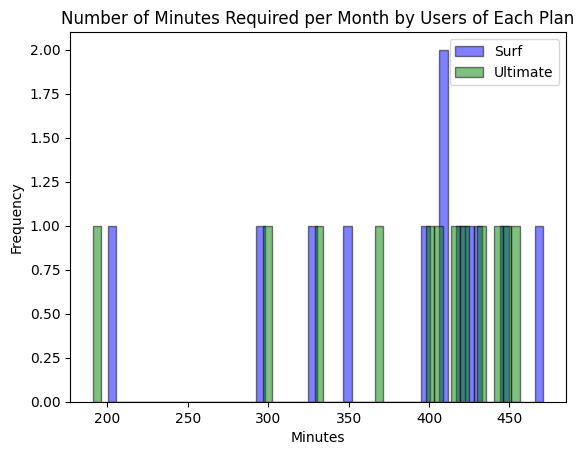

In [32]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
plt.hist(average_call_duration_surf.groupby('month')['call_minutes'].mean(), 
         bins=50, 
         edgecolor='k', 
         align='left', 
         histtype='barstacked', 
         color='blue', 
         alpha=0.5)
plt.hist(average_call_duration_ultimate.groupby('month')['call_minutes'].mean(), 
         bins=50, 
         edgecolor='k', 
         align='left', 
         histtype='barstacked', 
         color='green', 
         alpha=0.5)
plt.title('Number of Minutes Required per Month by Users of Each Plan')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.legend(['Surf', 'Ultimate'])
plt.show()
# Not sure how to do this one

In [51]:
# Calculate the mean and the variance of the monthly call duration
mean_call_duration_surf = np.mean(average_call_duration_surf['call_minutes_avg'])
variance_call_duration_surf = np.var(average_call_duration_surf['call_minutes_avg'])
mean_call_duration_ultimate = np.mean(average_call_duration_ultimate['call_minutes_avg'])
variance_call_duration_ultimate = np.var(average_call_duration_ultimate['call_minutes_avg'])
print("Surf Plan:")
print(f"Mean: {mean_call_duration_surf}. Variance: {variance_call_duration_surf}.")
print()
print("Ultimate Plan:")
print(f"Mean: {mean_call_duration_ultimate}. Variance: {variance_call_duration_ultimate}.")

Surf Plan:
Mean: 7.158129850659148. Variance: 1.2267282557007997.

Ultimate Plan:
Mean: 7.078557173137357. Variance: 0.9141908573365181.


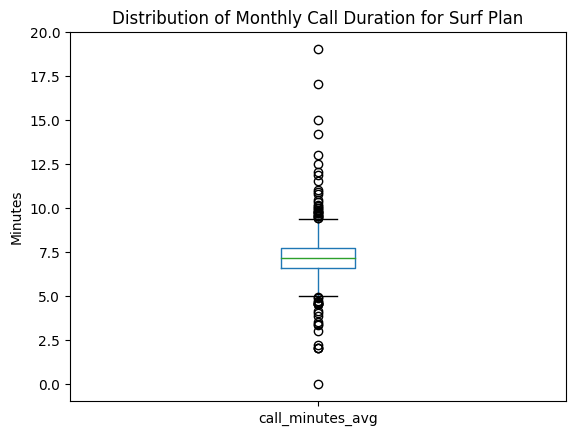

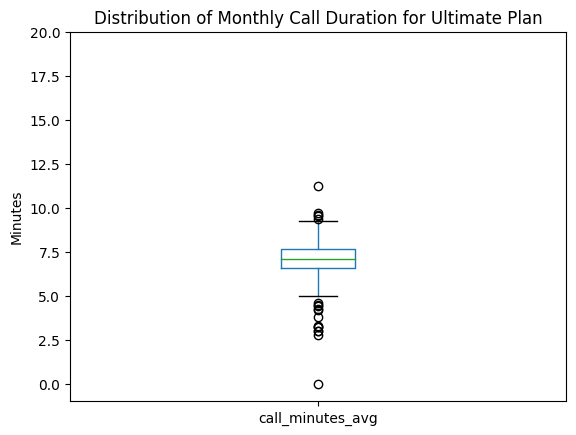

In [34]:
# Plot a boxplot to visualize the distribution of the monthly call duration
average_call_duration_surf['call_minutes_avg'].plot(kind='box',
                                                    vert=True,
                                                    title='Distribution of Monthly Call Duration for Surf Plan',
                                                    ylabel='Minutes',
                                                    ylim=[-1,20])
plt.show()
average_call_duration_ultimate['call_minutes_avg'].plot(kind='box',
                                                        vert=True,
                                                        title='Distribution of Monthly Call Duration for Ultimate Plan',
                                                        ylabel='Minutes',
                                                        ylim=[-1,20])
plt.show()
# I would like both boxplots side by side on the same plot - unsure how
# I wasn't able to change the x-axis label, only add another one

Users behavior does not appear to be different between the Surf and Ultimate Plans. The mean and variance of average call duration appears to be very similar.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
To avoid repetitive code you could utilize functions. 

I need to practice doing that more :^)

### Messages

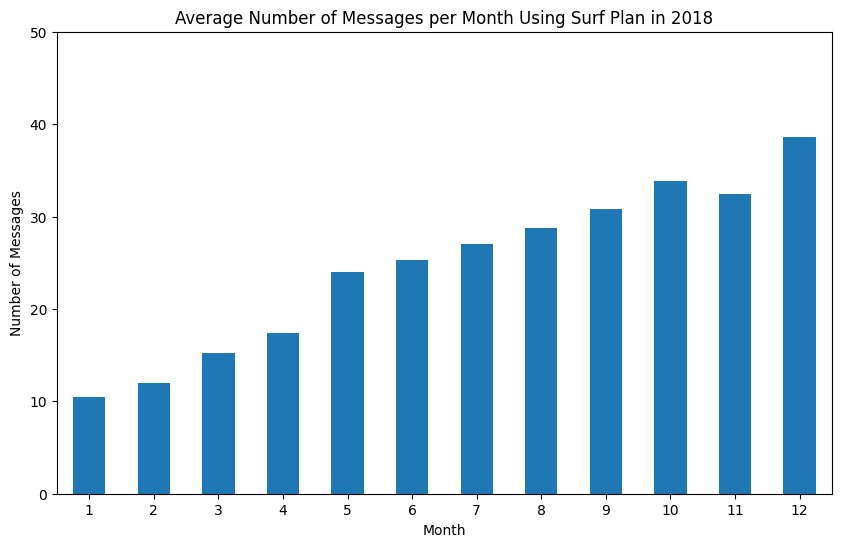

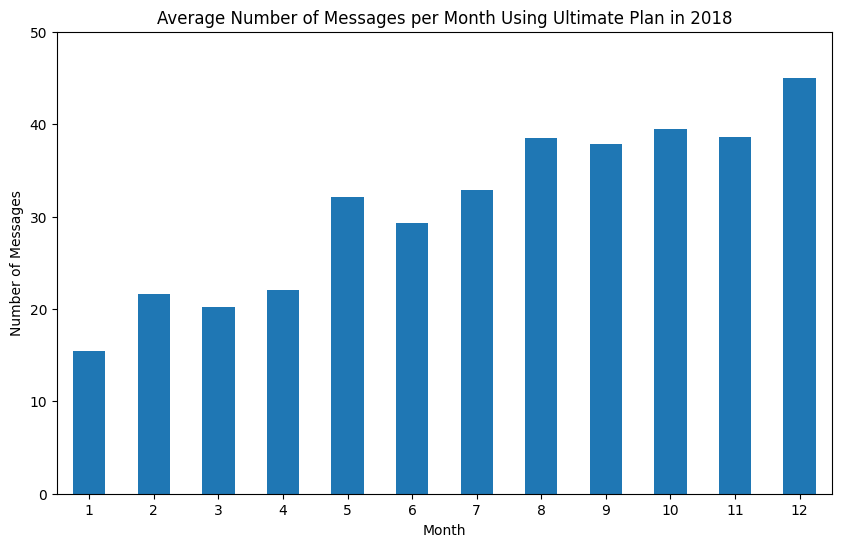

In [88]:
# Compare the number of messages users of each plan tend to send each month
# Making new dataframes for number of messages sent by users of each plan per month
messages_surf = aggregate_data.query("plan == 'surf'")[['month','message_number']]
messages_ultimate = aggregate_data.query("plan == 'ultimate'")[['month','message_number']]
# Grouping message number by month, taking mean, and plotting
messages_surf.groupby('month')['message_number'].mean().plot(kind='bar', 
                                                                            legend=False, 
                                                                            rot=0,
                                                                            title='Average Number of Messages per Month Using Surf Plan in 2018',
                                                                            figsize=[10,6],
                                                                            xlabel='Month',
                                                                            ylabel='Number of Messages',
                                                                            ylim=[0,50])
plt.show()
messages_ultimate.groupby('month')['message_number'].mean().plot(kind='bar', 
                                                                                legend=False, 
                                                                                rot=0,
                                                                                title='Average Number of Messages per Month Using Ultimate Plan in 2018',
                                                                                figsize=[10,6],
                                                                                xlabel='Month',
                                                                                ylabel='Number of Messages',
                                                                                ylim=[0,50])
plt.show()

In [53]:
# Calculate the mean and the variance of the monthly message amount
mean_messages_surf = np.mean(messages_surf['message_number'])
variance_messages_surf = np.var(messages_surf['message_number'])
mean_messages_ultimate = np.mean(messages_ultimate['message_number'])
variance_messages_ultimate = np.var(messages_ultimate['message_number'])
print("Surf Plan:")
print(f"Mean: {mean_messages_surf}. Variance: {variance_messages_surf}.")
print()
print("Ultimate Plan:")
print(f"Mean: {mean_messages_ultimate}. Variance: {variance_messages_ultimate}.")

Surf Plan:
Mean: 31.15956770502225. Variance: 1126.008231726662.

Ultimate Plan:
Mean: 37.55138888888889. Variance: 1207.0779147376545.


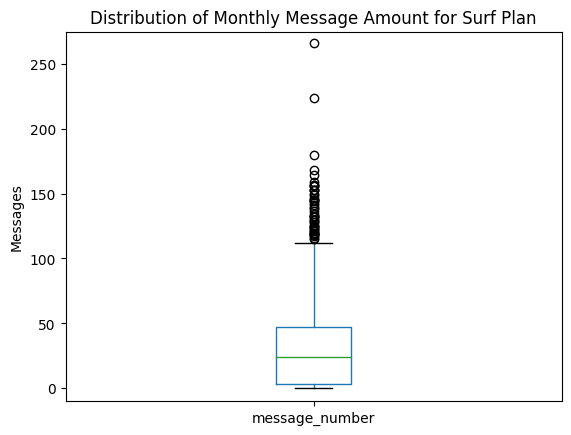

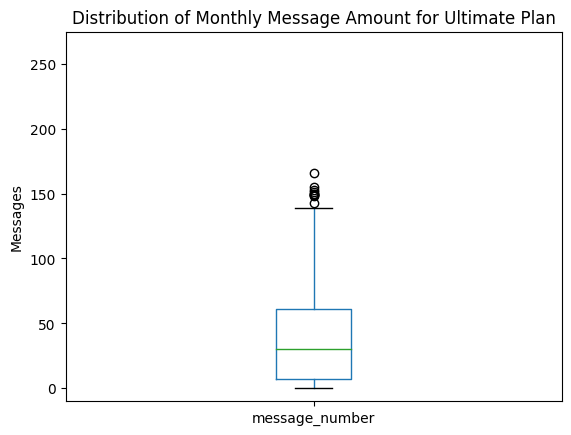

In [37]:
# Plot a boxplot to visualize the distribution of the monthly message amount
messages_surf['message_number'].plot(kind='box',
                                                    vert=True,
                                                    title='Distribution of Monthly Message Amount for Surf Plan',
                                                    ylabel='Messages',
                                                    ylim=[-10,275])
plt.show()
messages_ultimate['message_number'].plot(kind='box',
                                                        vert=True,
                                                        title='Distribution of Monthly Message Amount for Ultimate Plan',
                                                        ylabel='Messages',
                                                        ylim=[-10,275])
plt.show()
# I would like both boxplots side by side on the same plot - unsure how
# I wasn't able to change the x-axis label, only add another one

Users of the Ultimate Plan appear to send more messages on average.

### Internet

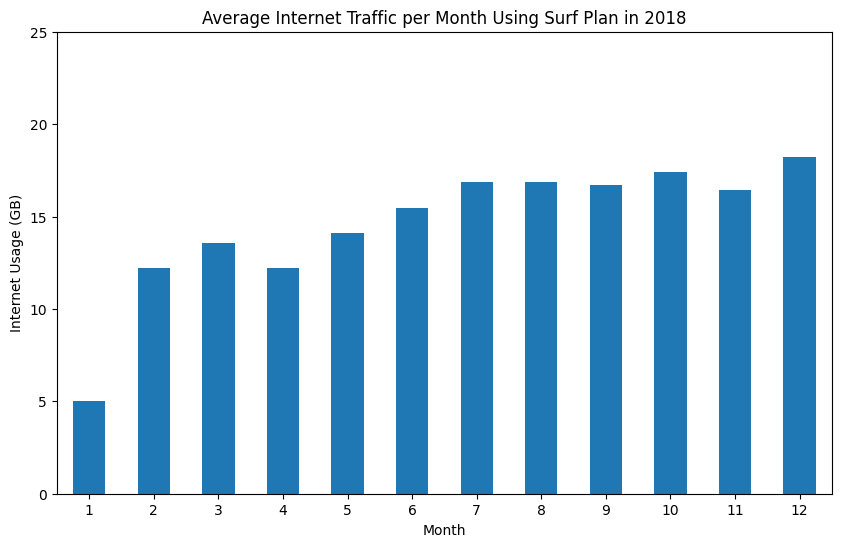

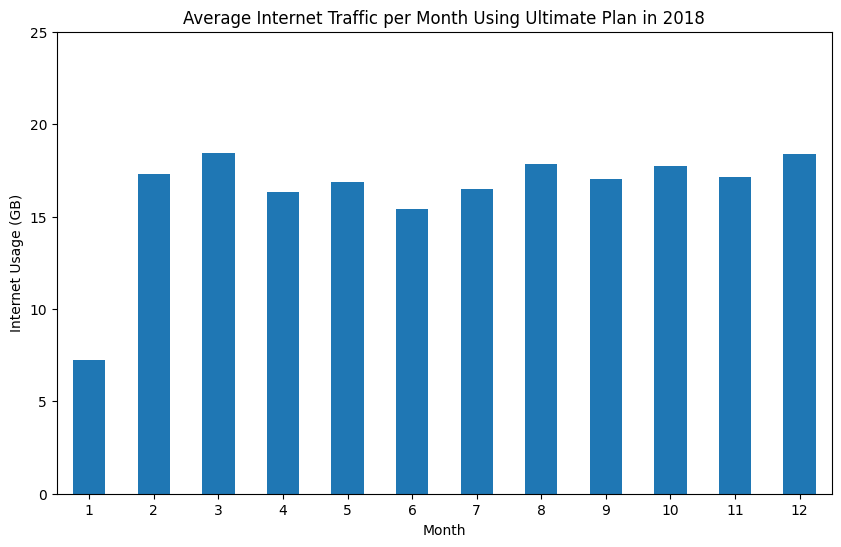

In [81]:
# Compare the amount of internet traffic consumed by users per plan
# Making new dataframes for internet usage by users of each plan per month
internet_surf = aggregate_data.query("plan == 'surf'")[['month','rounded_gb']]
internet_ultimate = aggregate_data.query("plan == 'ultimate'")[['month','rounded_gb']]
# Grouping message number by month, taking mean, and plotting
internet_surf.groupby('month')['rounded_gb'].mean().plot(kind='bar', 
                                                                            legend=False, 
                                                                            rot=0,
                                                                            title='Average Internet Traffic per Month Using Surf Plan in 2018',
                                                                            figsize=[10,6],
                                                                            xlabel='Month',
                                                                            ylabel='Internet Usage (GB)',
                                                                            ylim=[0,25])
plt.show()
internet_ultimate.groupby('month')['rounded_gb'].mean().plot(kind='bar', 
                                                                                legend=False, 
                                                                                rot=0,
                                                                                title='Average Internet Traffic per Month Using Ultimate Plan in 2018',
                                                                                figsize=[10,6],
                                                                                xlabel='Month',
                                                                                ylabel='Internet Usage (GB)',
                                                                                ylim=[0,25])
plt.show()

In [39]:
# Calculate the mean and the variance of the monthly internet traffic
mean_internet_surf = np.mean(internet_surf['rounded_gb'])
variance_internet_surf = np.var(internet_surf['rounded_gb'])
mean_internet_ultimate = np.mean(internet_ultimate['rounded_gb'])
variance_internet_ultimate = np.var(internet_ultimate['rounded_gb'])
print("Surf Plan:")
print(f"Mean: {mean_internet_surf}. Variance: {variance_internet_surf}.")
print()
print("Ultimate Plan:")
print(f"Mean: {mean_internet_ultimate}. Variance: {variance_internet_ultimate}.")

Surf Plan:
Mean: 16.670692943420217. Variance: 61.54444942447023.

Ultimate Plan:
Mean: 17.306944444444444. Variance: 58.748840663580246.


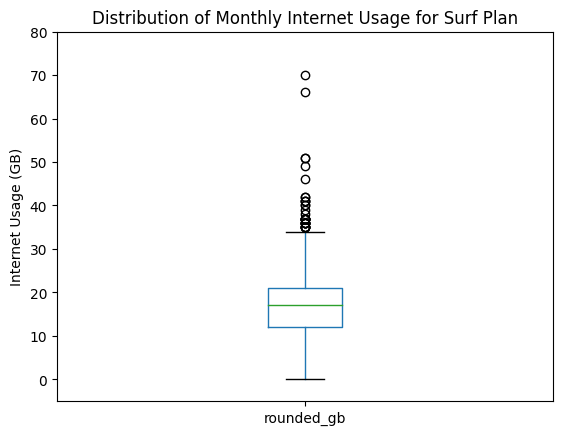

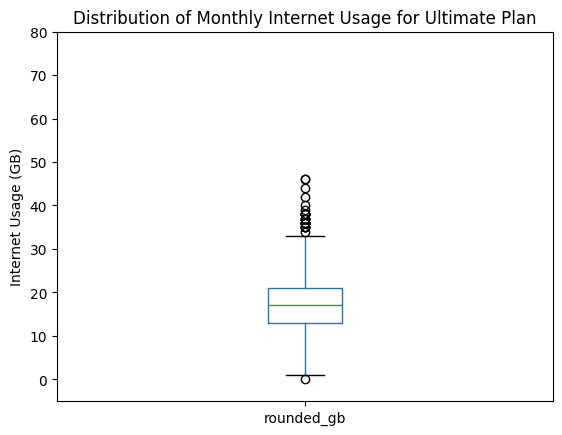

In [77]:
# Plot a boxplot to visualize the distribution of internet usage amount
internet_surf['rounded_gb'].plot(kind='box',
                                                    vert=True,
                                                    title='Distribution of Monthly Internet Usage for Surf Plan',
                                                    ylabel='Internet Usage (GB)',
                                                    ylim=[-5,80])
plt.show()
internet_ultimate['rounded_gb'].plot(kind='box',
                                                        vert=True,
                                                        title='Distribution of Monthly Internet Usage for Ultimate Plan',
                                                        ylabel='Internet Usage (GB)',
                                                        ylim=[-5,80])
plt.show()
# I would like both boxplots side by side on the same plot - unsure how
# I wasn't able to change the x-axis label, only add another one

Internet usage appears very similar between the two plans.

## Revenue

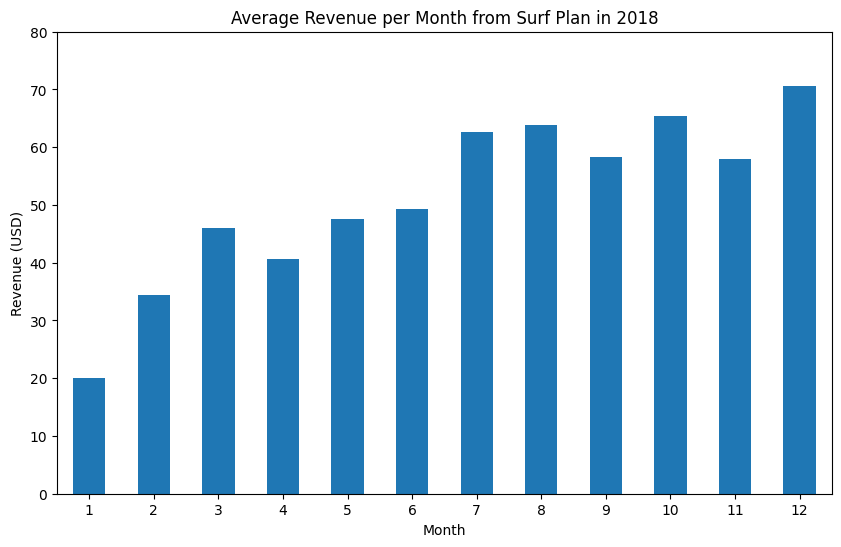

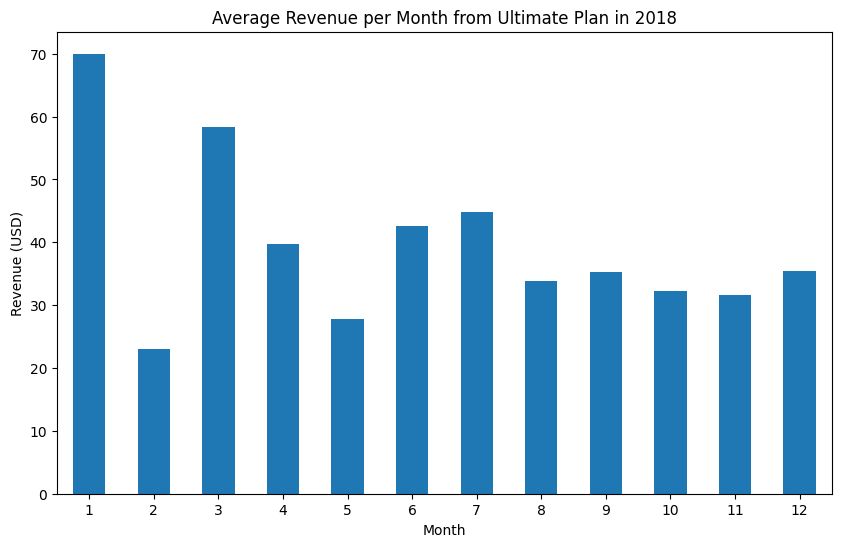

In [41]:
# Compare the revenue for each plan
# Making new dataframes for the revenue of each plan per month
revenue_surf = aggregate_data.query("plan == 'surf'")[['month','monthly_revenue']]
revenue_ultimate = aggregate_data.query("plan == 'ultimate'")[['month','monthly_revenue']]
# Grouping message number by month, taking mean, and plotting
revenue_surf.groupby('month')['monthly_revenue'].mean().plot(kind='bar', 
                                                                            legend=False, 
                                                                            rot=0,
                                                                            title='Average Revenue per Month from Surf Plan in 2018',
                                                                            figsize=[10,6],
                                                                            xlabel='Month',
                                                                            ylabel='Revenue (USD)',
                                                                            ylim=[0,80])
plt.show()
revenue_ultimate.groupby('month')['monthly_revenue'].mean().plot(kind='bar', 
                                                                                legend=False, 
                                                                                rot=0,
                                                                                title='Average Revenue per Month from Ultimate Plan in 2018',
                                                                                figsize=[10,6],
                                                                                xlabel='Month',
                                                                                ylabel='Revenue (USD)',
                                                                                )
plt.show()

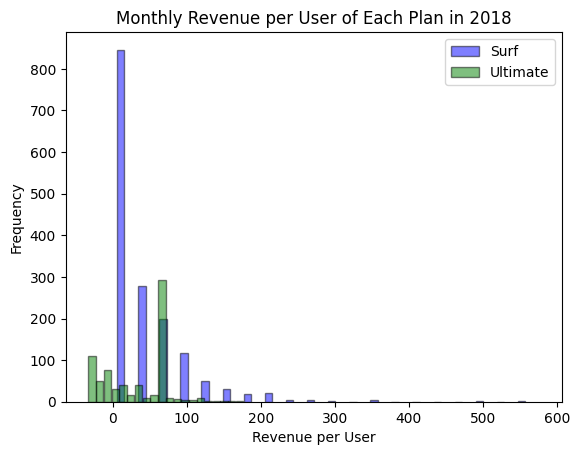

In [83]:
# Plot a histogram of revenue per user per plan
plt.hist(revenue_surf['monthly_revenue'], 
         bins=20, 
         edgecolor='k', 
         align='left', 
         histtype='bar', 
         color='blue', 
         alpha=0.5,
         width=10,
         rwidth=1)
plt.hist(revenue_ultimate['monthly_revenue'], 
         bins=20, 
         edgecolor='k', 
         align='left', 
         histtype='bar', 
         color='green', 
         alpha=0.5,
         width=10,
         rwidth=1)
plt.title('Monthly Revenue per User of Each Plan in 2018')
plt.xlabel('Revenue per User')
plt.ylabel('Frequency')
plt.legend(['Surf', 'Ultimate'])
plt.show()
# Not sure how to display this properly - Ultimate Plan shows negative revenues and spacing issues

In [43]:
# Calculate the mean and the variance of the monthly revenue per plan
mean_revenue_surf = np.mean(revenue_surf['monthly_revenue'])
variance_revenue_surf = np.var(revenue_surf['monthly_revenue'])
mean_revenue_ultimate = np.mean(revenue_ultimate['monthly_revenue'])
variance_revenue_ultimate = np.var(revenue_ultimate['monthly_revenue'])
print("Surf Plan:")
print(f"Mean: {mean_revenue_surf}. Variance: {variance_revenue_surf}.")
print()
print("Ultimate Plan:")
print(f"Mean: {mean_revenue_ultimate}. Variance: {variance_revenue_ultimate}.")

Surf Plan:
Mean: 60.70640813731723. Variance: 3065.8848438690247.

Ultimate Plan:
Mean: 35.65138888888889. Variance: 1791.1381925154321.


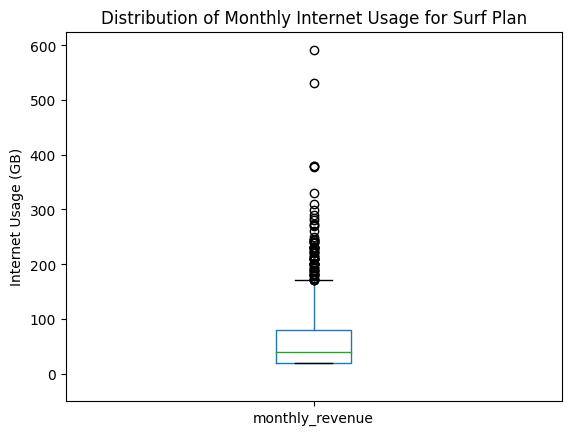

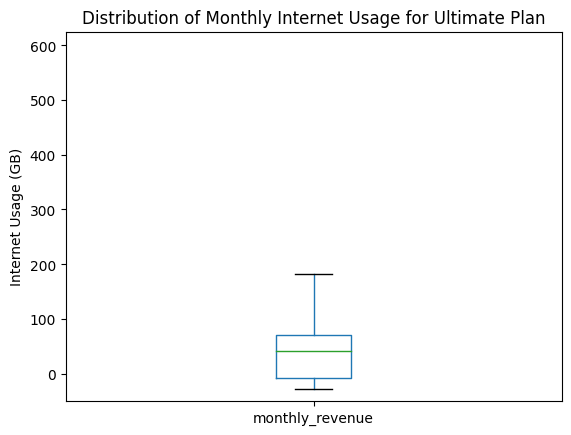

In [44]:
# Plot a boxplot to visualize the distribution of monthly revenue per plan
revenue_surf['monthly_revenue'].plot(kind='box',
                                                    vert=True,
                                                    title='Distribution of Monthly Internet Usage for Surf Plan',
                                                    ylabel='Internet Usage (GB)',
                                                    ylim=[-50,625])
plt.show()
revenue_ultimate['monthly_revenue'].plot(kind='box',
                                                        vert=True,
                                                        title='Distribution of Monthly Internet Usage for Ultimate Plan',
                                                        ylabel='Internet Usage (GB)',
                                                        ylim=[-50,625])
plt.show()
# I would like both boxplots side by side on the same plot - unsure how
# I wasn't able to change the x-axis label, only add another one

It would appear that revenue is significantly higher from the Surf Plan than from the Ultimate Plan, however, there is a much higher variance among users of the Surf Plan, indicating more of these users are purchasing additional internet usage beyond what is included in their plan.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. It's great that you combined both plans in one graph for comparison and also used different graph types to check the available data.
- If you have time and are willing to practice, you can display two charts (a histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [45]:
# Test the hypotheses
# Null hypothesis = The average revenue from Surf and Ultimate Plans is equal.
# Alternative hypothesis = The average revenue from Surf and Ultimate Plans differs.
# Alpha = 0.05
# We will use a two-tailed test since we are testing for "difference," not "higher/lower."
# We are comparing two data sets, therefore we will use st.ttest_ind
alpha_plans = 0.05
result_plans = st.ttest_ind(revenue_surf['monthly_revenue'], revenue_ultimate['monthly_revenue'])
print(f'p-value: {result_plans.pvalue}')
print()
if result_plans.pvalue < alpha_plans:
    print('We can reject the null hypothesis: The data suggests that there is a statistically significant difference between revenue from the Surf and Ultimate Plans in 2018.')
else:
    print('We cannot reject the null hypothesis: The data suggests that there is not a statistically significant difference between revenue from the Surf and Ultimate Plans in 2018.')

p-value: 1.816970126494534e-26

We can reject the null hypothesis: The data suggests that there is a statistically significant difference between revenue from the Surf and Ultimate Plans in 2018.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [46]:
# Create dataframe with user ID and city
users_with_city = users[['user_id', 'city']]

# Merge user city information with aggregated usage data
aggregate_data = aggregate_data.merge(users_with_city, on='user_id', how='left')

# Check updated aggregate dataframe
aggregate_data.info()

# Query for only users residing in NY-NJ-PA region and check filtered dataframe
aggregate_data_ny_nj = aggregate_data.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'") 
aggregate_data_ny_nj.info()

# Query for only users NOT residing in NY-NJ-PA region and check filtered dataframe
aggregate_data_not_ny_nj = aggregate_data.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA'") 
aggregate_data_not_ny_nj.info()

# Test the hypotheses
# Null hypothesis = The average revenue from users in the NY-NJ region is equal to those in the rest of the US.
# Alternative hypothesis = The average revenue from users in the NY-NJ region is different than from the rest of the US.
# Alpha = 0.05
# We will use a two-tailed test since we are testing for "difference," not "higher/lower."
# We are comparing two data sets, therefore we will use st.ttest_ind
alpha_region = 0.05
result_region = st.ttest_ind(aggregate_data_ny_nj['monthly_revenue'], aggregate_data_not_ny_nj['monthly_revenue'])
print()
print(f'p-value: {result_region.pvalue}')
print()
if result_region.pvalue < alpha_region:
    print('We can reject the null hypothesis: The data suggests that there is a statistically significant difference between revenue from users in the NY-NJ region and those in the rest of the US in 2018.')
else:
    print('We cannot reject the null hypothesis: The data suggests that there is not a statistically significant difference between revenue from users in the NY-NJ region and those in the rest of the US in 2018.')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   call_number            2293 non-null   float64
 3   call_minutes           2293 non-null   float64
 4   message_number         2293 non-null   float64
 5   internet_traffic_mb    2293 non-null   float64
 6   rounded_gb             2293 non-null   int64  
 7   plan                   2293 non-null   object 
 8   plan_name              2293 non-null   object 
 9   messages_included      2293 non-null   int64  
 10  mb_per_month_included  2293 non-null   int64  
 11  minutes_included       2293 non-null   int64  
 12  usd_monthly_pay        2293 non-null   int64  
 13  usd_per_gb             2293 non-null   int64  
 14  usd_per_message        2293 non-null   float64
 15  usd_

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Everything is correct here. Hypotheses have been formulated correctly. 
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
    

## General conclusion

The data suggests that there is a statistically significant difference between revenue from the Surf and Ultimate Plans in 2018 (α = 5%). The average monthly revenue per user enrolled in the Surf Plan in 2018 was $60.71, while that of the Ultimate Plan was $35.65.

The most likely explanation for this difference stems from the observation that there doesn't appear to be much of a difference in average call duration (x̄ = 7.16, 7.08), messaging count (x̄ = 31.16, 37.55), or internet usage (GB) (x̄ = 16.67, 17.31) behaviors between users of the two plans. Therefore, the Surf Plan has higher revenue because a larger share of usage is being billed at the higher rate (above the scope of the plan) whereas the Ultimate Plan is providing a discount for these included services.

The overall recommendation of this report is that, barring any changes to the plan details themselves, the majority of the marketing budget should be directed towards promoting the Surf Plan. 

In the future, additional studies could be done to assess the popularity of the two plans with users. Of the data set used in this report, 67.8% of users are enrolled in the Surf Plan. It would be helpful to assess if this sample is representative of the total population of Megaline customers to ensure that any conclusions drawn apply to the entire United States customer base.
 
Additionally, the data suggests that there is not a statistically significant difference between revenue from users in the NY-NJ region and those in the rest of the US in 2018 (α = 5%). Studies such as this are helpful to determine if any shifts in marketing strategy are required based on local market competition.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusions. It is very structured and provides insights about what you accomplished and recommendations to the business.
    

Updated statistical values/conclusions based on changing missing values to 0 above.